In [4]:
#import the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#Load your country's dataset into a DataFrame:

df_b = pd.read_csv('data/benin-malanville.csv') 
df_s = pd.read_csv('data/sierraleone-bumbuna.csv') 
df_t = pd.read_csv('data/togo-dapaong_qc.csv') 
#Summary Statistic
df_b.describe()
df_s.describe()
df_t.describe()







,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [21]:
def missing_values_report(df, country_name):
    missing_values = df.isna().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_report = pd.DataFrame({
        f'Missing Values - {country_name}': missing_values,
        f'Percentage - {country_name}': missing_percentage
    })
    return missing_report[missing_report[f'Percentage - {country_name}'] > 0]

report_benin = missing_values_report(df_b, 'Benin')
report_sierra_leone = missing_values_report(df_s, 'Sierra Leone')
report_togo = missing_values_report(df_t, 'Togo')

print(report_benin)
print(report_sierra_leone)
print(report_togo)


          Missing Values - Benin  Percentage - Benin
Comments                  525600               100.0
          Missing Values - Sierra Leone  Percentage - Sierra Leone
Comments                         525600                      100.0
          Missing Values - Togo  Percentage - Togo
Comments                 525600              100.0


In [25]:
# Outlier Detection & Basic Cleaning
#Compute Z-scores:
#for Benin
numeric_cols_b = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores_b = np.abs(stats.zscore(df_b[numeric_cols_b], nan_policy='omit'))
outliers_b = (z_scores_b> 3)

df_b[numeric_cols_b] = df_b[numeric_cols_b].fillna(df[numeric_cols_b].median())

#for Serriialleione
numeric_cols_s = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores_s=  np.abs(stats.zscore(df_s[numeric_cols_s], nan_policy='omit'))
outliers_s = (z_scores_s > 3)

df_s[numeric_cols_s] = df_s[numeric_cols_s].fillna(df_s[numeric_cols_s].median())

#for Togo
numeric_cols_t = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores_t = np.abs(stats.zscore(df_t[numeric_cols_t], nan_policy='omit'))
outliers_t = (z_scores_t > 3)

df_t[numeric_cols_t] = df_t[numeric_cols_t].fillna(df_t[numeric_cols_t].median())

C:\Users\ayedr\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


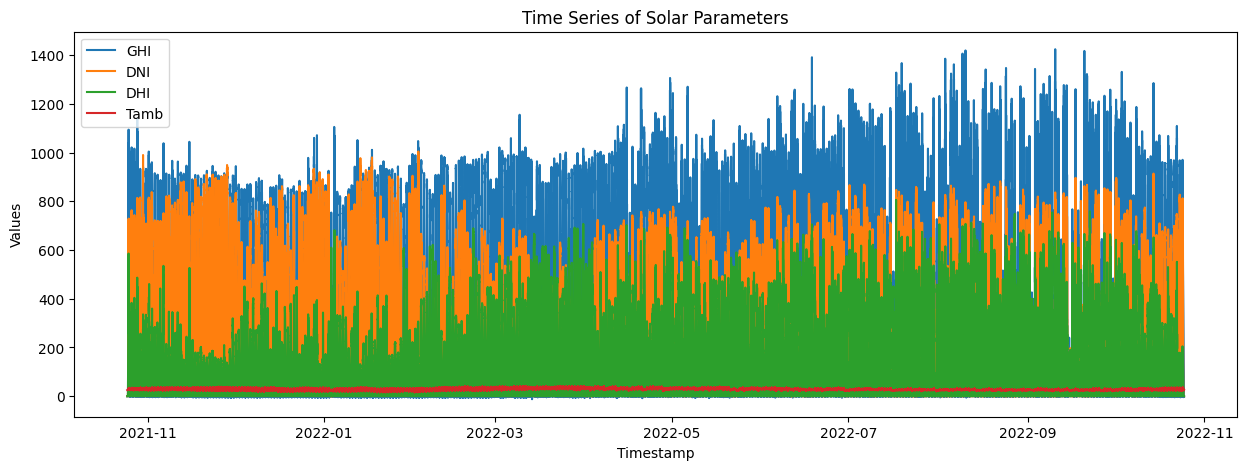

In [27]:
#Handle Missing Values:


#Export Cleaned Data:
df_b[numeric_cols_b] = df_b[numeric_cols_b].fillna(df_b[numeric_cols_b].median())
df_b.to_csv('data/Benin_clean.csv', index=False)  #for Benin

df_s[numeric_cols_s] = df_s[numeric_cols_s].fillna(df_s[numeric_cols_s].median())
df_s.to_csv('data/Serrallione_clean.csv', index=False)  #for Serrallione

df_t[numeric_cols_t] = df_t[numeric_cols_t].fillna(df_t[numeric_cols_t].median())
df_t.to_csv('data/Togo_clean.csv', index=False)  #for Togo

#Convert Timestamp:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
#Plot Time Series:
plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Time Series of Solar Parameters')
plt.show()


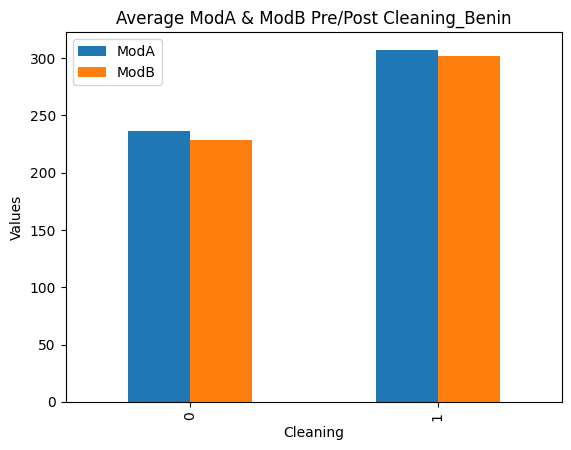

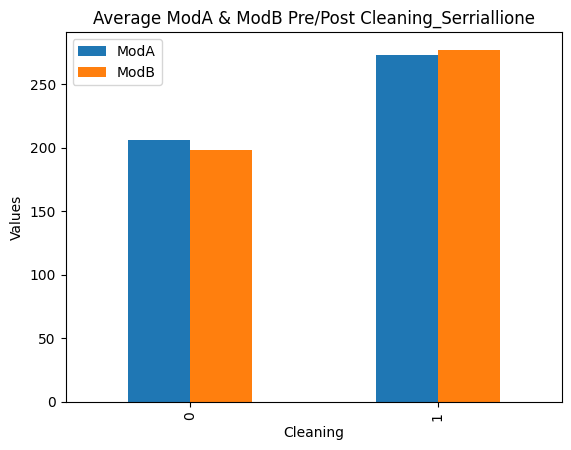

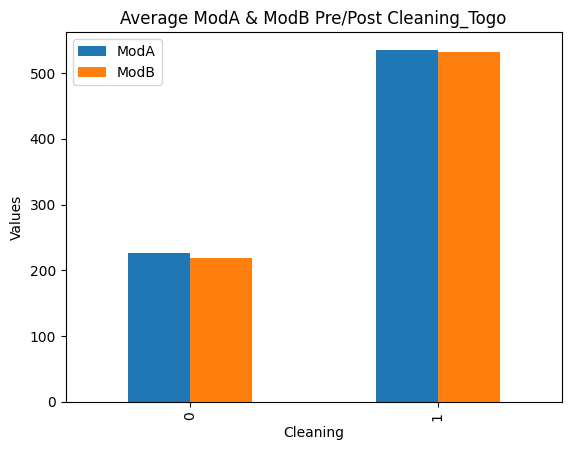

In [12]:
#Cleaning Impactfor Benin
df_b.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Average ModA & ModB Pre/Post Cleaning_Benin')
plt.ylabel('Values')
plt.show()

#Cleaning Impactfor Serriallione
df_s.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Average ModA & ModB Pre/Post Cleaning_Serriallione')
plt.ylabel('Values')
plt.show()

#Cleaning Impactfor Togo
df_t.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Average ModA & ModB Pre/Post Cleaning_Togo')
plt.ylabel('Values')
plt.show()


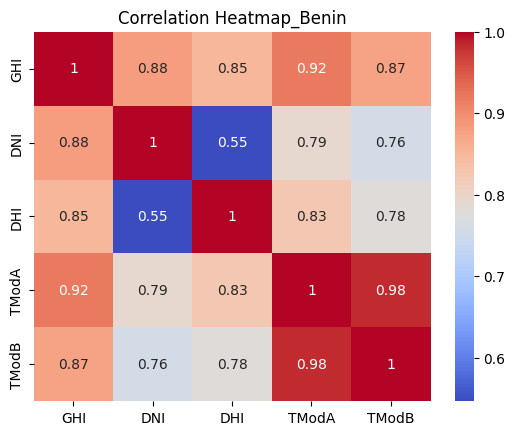

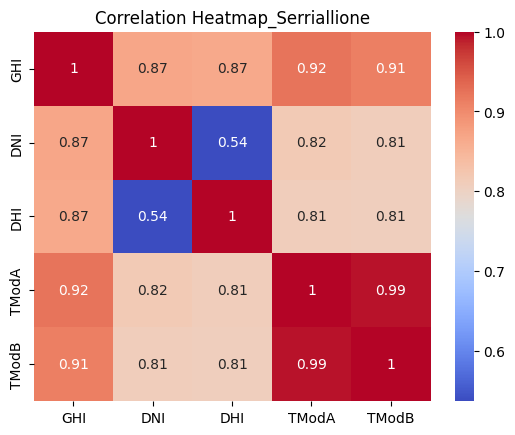

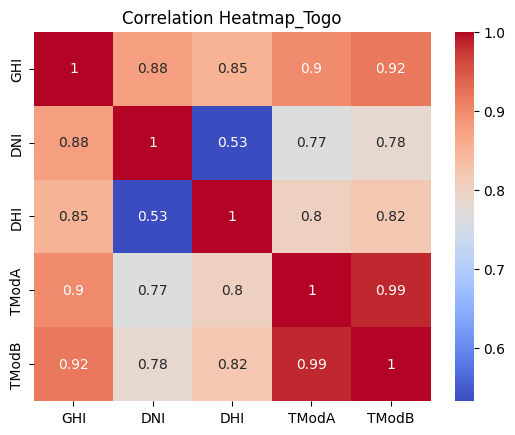

In [13]:
#Correlation Heatmapfor Benin:
corr = df_b[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap_Benin')
plt.show()

#Correlation Heatmapfor Serriallione:
corr = df_s[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap_Serriallione')
plt.show()

#Correlation Heatmapfor Togo:
corr = df_t[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap_Togo')
plt.show()

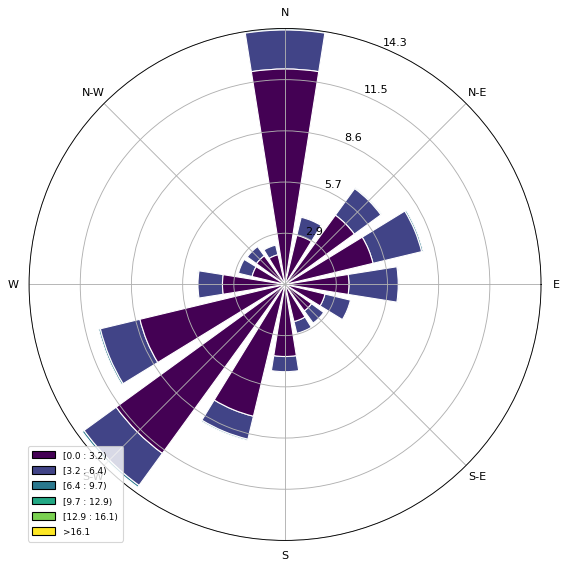

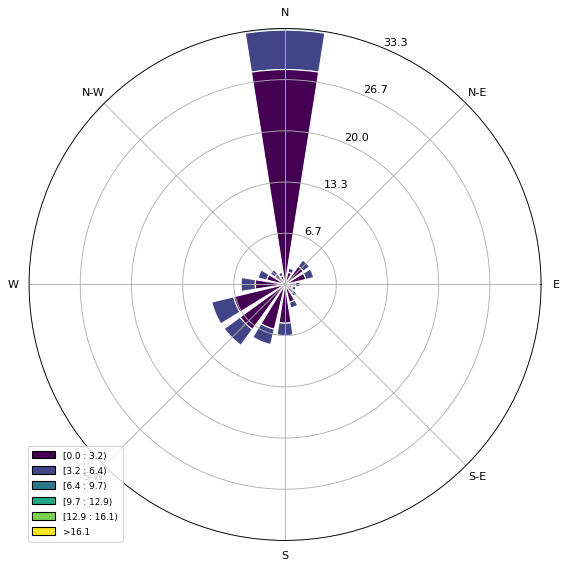

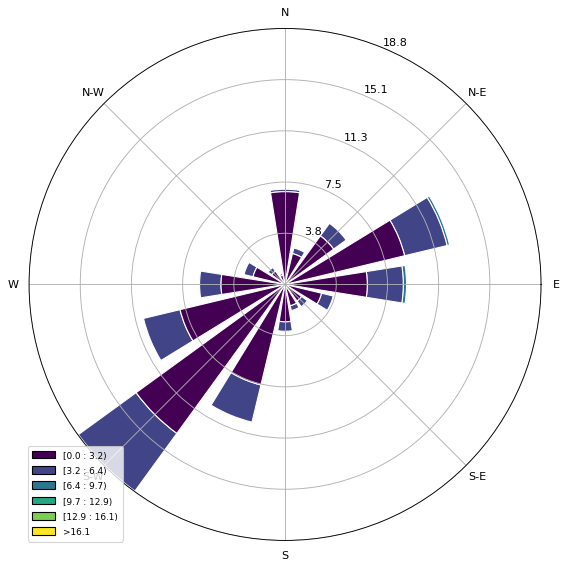

In [14]:
#Wind & Distribution Analysis
#Wind Rose Plot:
#for Benin
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ax_b = WindroseAxes.from_ax()
ax_b.bar(df_b['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax_b.set_legend()
plt.show()

#Wind & Distribution Analysis
#Wind Rose Plot:
#for Serrialione
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ax_s = WindroseAxes.from_ax()
ax_s.bar(df_s['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax_s.set_legend()
plt.show()

#Wind & Distribution Analysis
#Wind Rose Plot:
#for Togo
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ax_t = WindroseAxes.from_ax()
ax_t.bar(df_t['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax_t.set_legend()
plt.show()

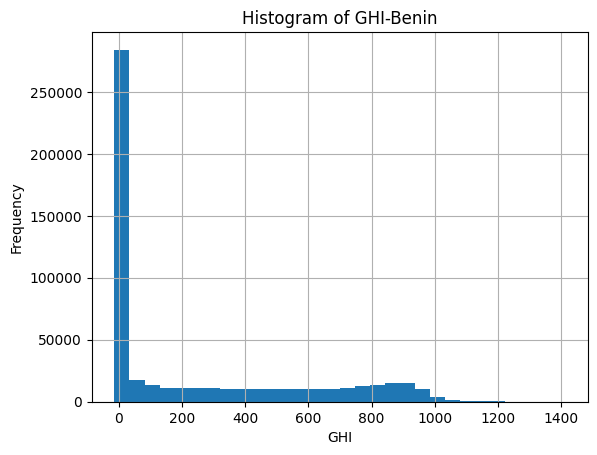

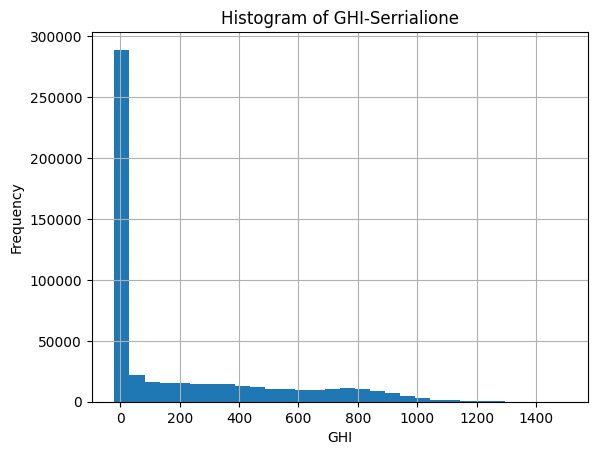

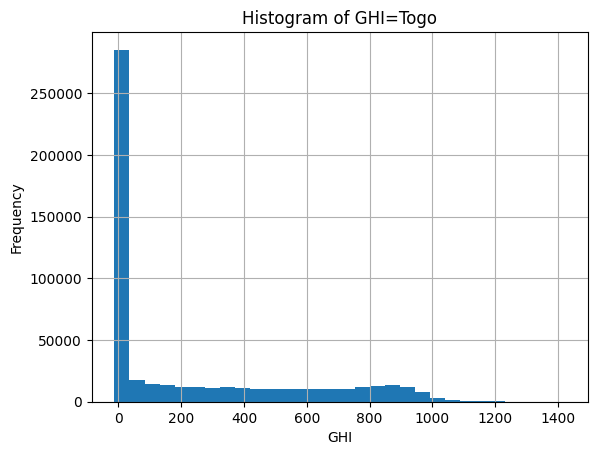

In [17]:
#Histogramsfor Benin:

df_b['GHI'].hist(bins=30)
plt.title('Histogram of GHI-Benin')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

#Histograms for Serriallione:

df_s['GHI'].hist(bins=30)
plt.title('Histogram of GHI-Serrialione')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

#Histograms for Togo:

df_t['GHI'].hist(bins=30)
plt.title('Histogram of GHI=Togo')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

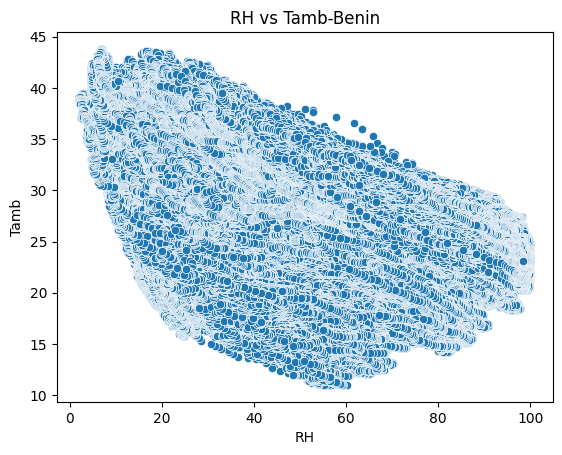

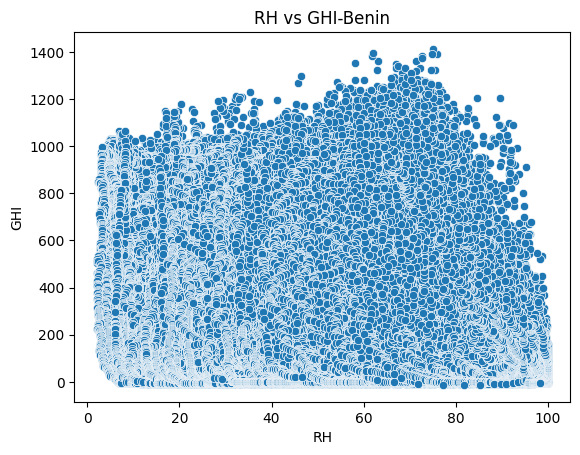

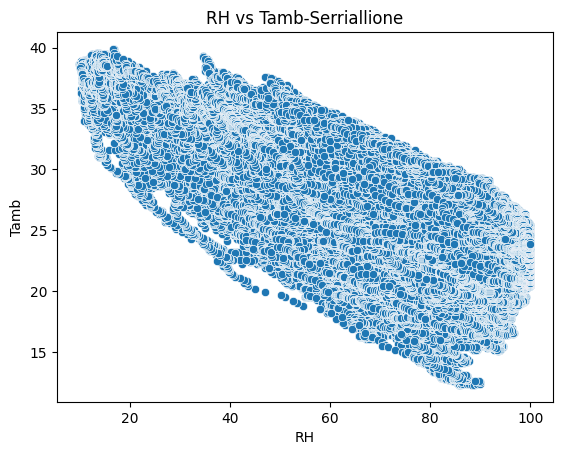

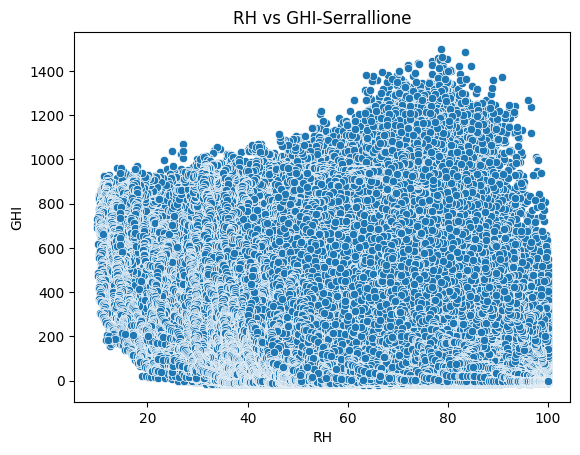

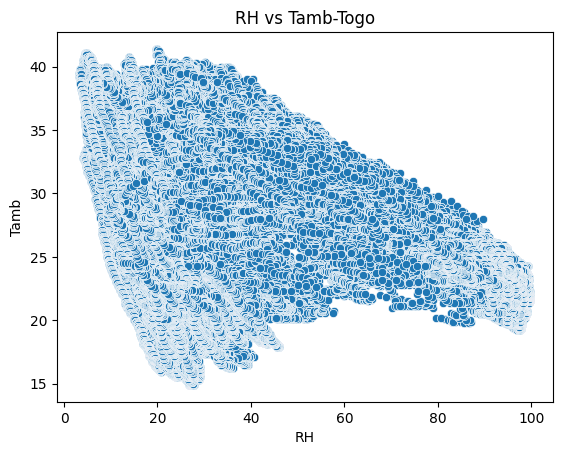

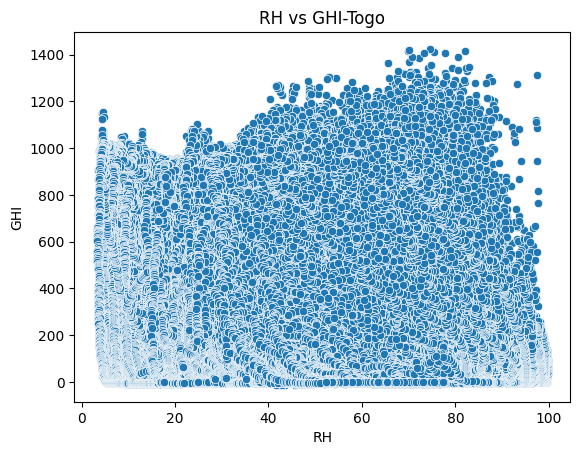

In [18]:
#Temperature Analysis for Benin

sns.scatterplot(x='RH', y='Tamb', data=df_b)
plt.title('RH vs Tamb-Benin')
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df_b)
plt.title('RH vs GHI-Benin')
plt.show()

#Temperature Analysis for Serriallione

sns.scatterplot(x='RH', y='Tamb', data=df_s)
plt.title('RH vs Tamb-Serriallione')
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df_s)
plt.title('RH vs GHI-Serrallione')
plt.show()

#Temperature Analysis for Togo

sns.scatterplot(x='RH', y='Tamb', data=df_t)
plt.title('RH vs Tamb-Togo')
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df_t)
plt.title('RH vs GHI-Togo')
plt.show()

In [28]:
#Load Cleaned Datasets
import pandas as pd

benin = pd.read_csv('data/Benin_clean.csv')
sierra_leone = pd.read_csv('data/Serrallione_clean.csv')
togo = pd.read_csv('data/Togo_clean.csv')


In [29]:
#Computing Key Solar Metrics

def compute_solar_metrics(df, country_name):
    return {
        'Country': country_name,
        'Mean GHI': df['GHI'].mean(),
        'Mean DNI': df['DNI'].mean(),
        'Mean DHI': df['DHI'].mean()
    }

metrics = [
    compute_solar_metrics(benin, 'Benin'),
    compute_solar_metrics(sierra_leone, 'Sierra Leone'),
    compute_solar_metrics(togo, 'Togo')
]

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

        Country    Mean GHI    Mean DNI    Mean DHI
0         Benin  240.559452  167.187516  115.358961
1  Sierra Leone  201.957515  116.376337  113.720571
2          Togo  230.555040  151.258469  116.444352


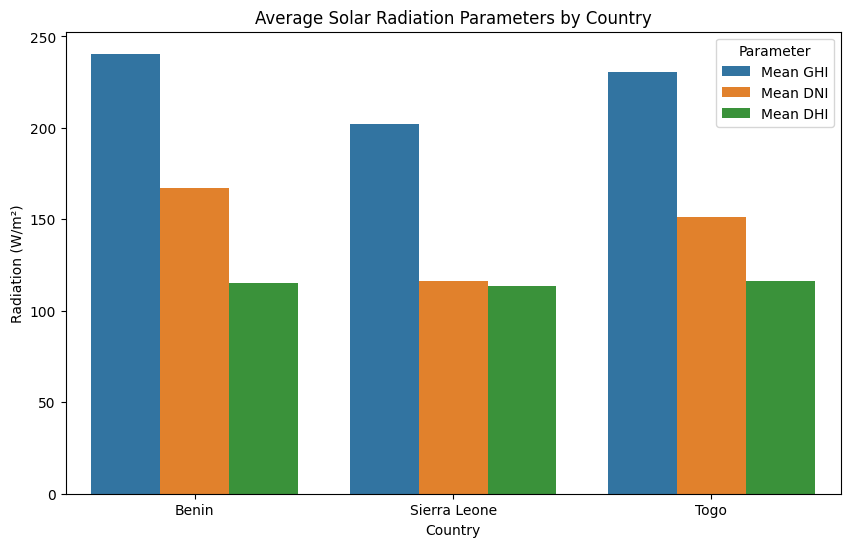

In [30]:
#Visualizing Solar Radiation

import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame for easier plotting
metrics_melted = metrics_df.melt(id_vars='Country', var_name='Parameter', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Country', y='Value', hue='Parameter')
plt.title('Average Solar Radiation Parameters by Country')
plt.ylabel('Radiation (W/m²)')
plt.show()

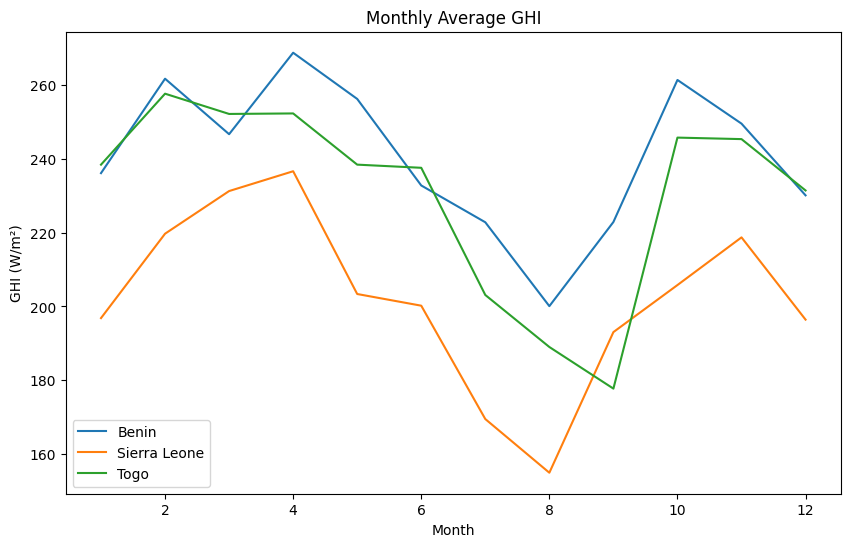

In [31]:
#Analyzing Temporal Patterns

# Convert timestamp columns to datetime
benin['Timestamp'] = pd.to_datetime(benin['Timestamp'])
sierra_leone['Timestamp'] = pd.to_datetime(sierra_leone['Timestamp'])
togo['Timestamp'] = pd.to_datetime(togo['Timestamp'])

# Add a 'Month' column
benin['Month'] = benin['Timestamp'].dt.month
sierra_leone['Month'] = sierra_leone['Timestamp'].dt.month
togo['Month'] = togo['Timestamp'].dt.month

# Calculate monthly average GHI
benin_monthly = benin.groupby('Month')['GHI'].mean()
sierra_leone_monthly = sierra_leone.groupby('Month')['GHI'].mean()
togo_monthly = togo.groupby('Month')['GHI'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(benin_monthly.index, benin_monthly.values, label='Benin')
plt.plot(sierra_leone_monthly.index, sierra_leone_monthly.values, label='Sierra Leone')
plt.plot(togo_monthly.index, togo_monthly.values, label='Togo')
plt.title('Monthly Average GHI')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.show()

In [32]:
#Assessing Correlations with Other Variables

# Example: Correlation between GHI and Temperature for Benin
correlation = benin[['GHI', 'Tamb']].corr()
print(correlation)

           GHI      Tamb
GHI   1.000000  0.547513
Tamb  0.547513  1.000000
